In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)
X = np.hstack([raw_df.values[::2, :], raw_df.values[1::2, :2]])
y = raw_df.values[1::2, 2]

In [5]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)
y_train = pd.DataFrame(y_train,columns=["target"])
y_test = pd.DataFrame(y_test,columns=["target"])
X_train.info() # Check if we have null values

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 404 entries, 0 to 403
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       404 non-null    float64
 1   1       404 non-null    float64
 2   2       404 non-null    float64
 3   3       404 non-null    float64
 4   4       404 non-null    float64
 5   5       404 non-null    float64
 6   6       404 non-null    float64
 7   7       404 non-null    float64
 8   8       404 non-null    float64
 9   9       404 non-null    float64
 10  10      404 non-null    float64
 11  11      404 non-null    float64
 12  12      404 non-null    float64
dtypes: float64(13)
memory usage: 41.2 KB


In [8]:
X_train.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,0.35809,0.0,6.20,1.0,0.507,6.951,88.5,2.8617,8.0,307.0,17.4,391.70,9.71
1,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88
2,0.11329,30.0,4.93,0.0,0.428,6.897,54.3,6.3361,6.0,300.0,16.6,391.25,11.38
3,0.08829,12.5,7.87,0.0,0.524,6.012,66.6,5.5605,5.0,311.0,15.2,395.60,12.43
4,25.94060,0.0,18.10,0.0,0.679,5.304,89.1,1.6475,24.0,666.0,20.2,127.36,26.64


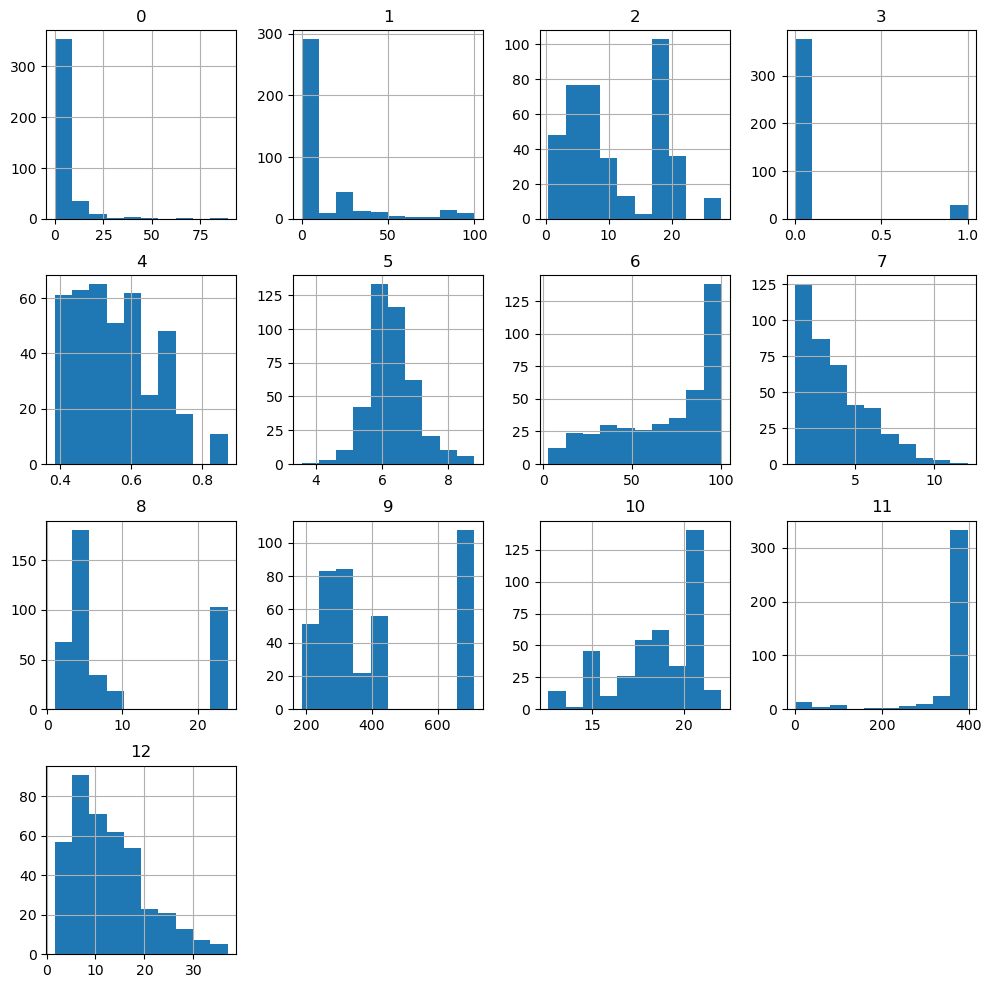

In [21]:
fig = plt.figure(figsize=(12,12))
ax = fig.add_subplot(111)
X_train.hist(ax=ax)
plt.show()

In [7]:
X_train.describe()  # looking at percentiles to get quick sense of distribution in smaller scales

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
count,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000,404.000000
mean,3.386324,11.794554,11.123441,0.069307,0.555886,6.301797,69.027228,3.770242,9.403465,402.844059,18.462376,358.785446,12.706188
std,8.137943,23.636906,6.993011,0.254290,0.115201,0.694692,28.106955,2.080583,8.661147,170.857022,2.194821,88.663438,7.299031
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.174200,1.000000,187.000000,12.600000,0.320000,1.730000
25%,0.078935,0.000000,5.130000,0.000000,0.449000,5.887750,45.675000,2.087875,4.000000,276.000000,17.400000,376.132500,6.727500
50%,0.256510,0.000000,9.125000,0.000000,0.538000,6.211000,77.950000,3.190950,5.000000,322.000000,19.100000,391.600000,11.300000
75%,3.359358,20.000000,18.100000,0.000000,0.631000,6.675000,93.900000,5.141475,24.000000,666.000000,20.200000,396.060000,17.112500
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,36.980000


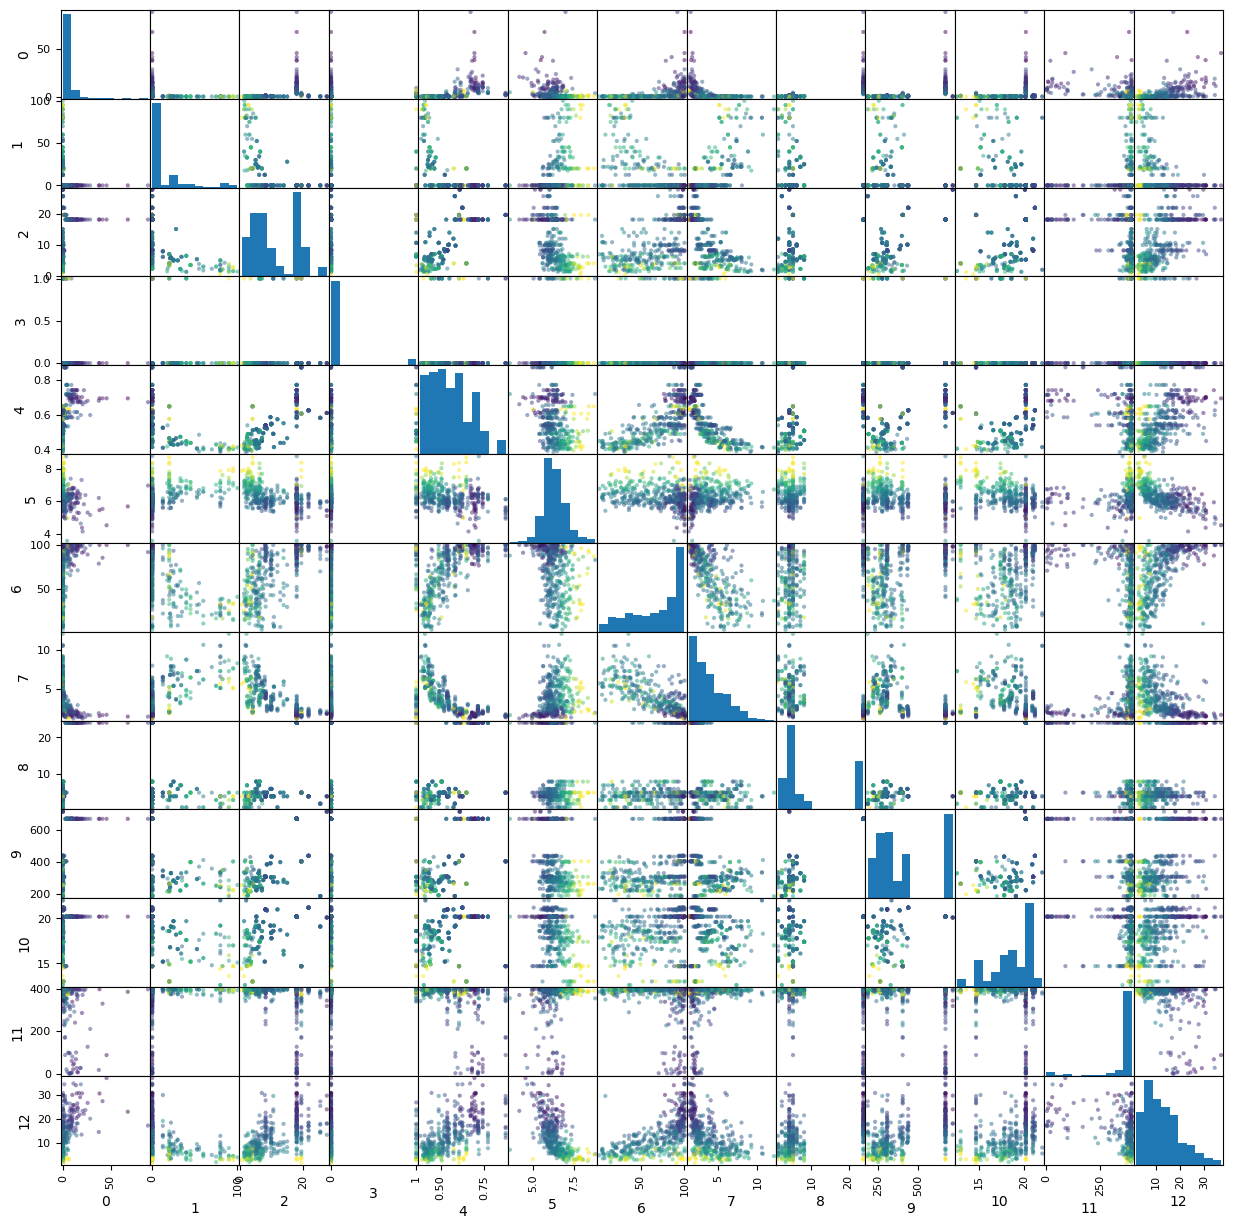

In [22]:
fig = plt.figure(figsize=(15,15))
ax = fig.add_subplot(111)
pd.plotting.scatter_matrix(X_train,ax=ax,c=y_train["target"],alpha=0.5)
plt.show()
# visually we can see color separation across range of values

In [9]:
pd.concat([X_train,y_train],axis=1).corr()[["target"]] \
            .sort_values("target",ascending=False) \
            .style.background_gradient(cmap="summer")

,target
target,1.000000
RM,0.705039
ZN,0.409824
B,0.354226
DIS,0.281013
CHAS,0.177620
CRIM,-0.411133
AGE,-0.413340
RAD,-0.425133
NOX,-0.459566


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x10e2bcd10>]],
      dtype=object)

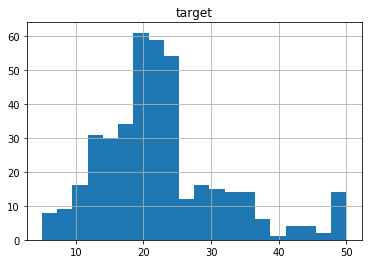

In [10]:
y_train.hist(bins=20)
# investigate train target distribution to see if we notice anything particular